# Evaluation examples

In [18]:
%load_ext autoreload
%autoreload 2
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPCv1 import ClusterPC as ClusterPCv1
from clustercausal.algorithms.ClusterPCv2 import ClusterPC as ClusterPCv2
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

In [57]:
%autoreload 2
# Node names from 0 to 19
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']#, '10', '11', '12', '13', '14', '15', '16', '17', '18','19']
node_names = None
#seed = 12343
simulation = Simulator(n_nodes = 12, n_edges = 20, n_clusters = 6, seed = 123, sample_size = 10, node_names=node_names)
cluster_dag = simulation.run()

2023-09-01 20:04:31,718 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [58]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X10'], 'C2': ['X2', 'X9', 'X11', 'X1'], 'C3': ['X6'], 'C4': ['X8', 'X12'], 'C5': ['X4'], 'C6': ['X3', 'X5', 'X7']}
[('C2', 'C6'), ('C1', 'C2'), ('C2', 'C5'), ('C2', 'C3'), ('C2', 'C4'), ('C4', 'C6'), ('C5', 'C6'), ('C1', 'C5'), ('C1', 'C6'), ('C1', 'C4')]


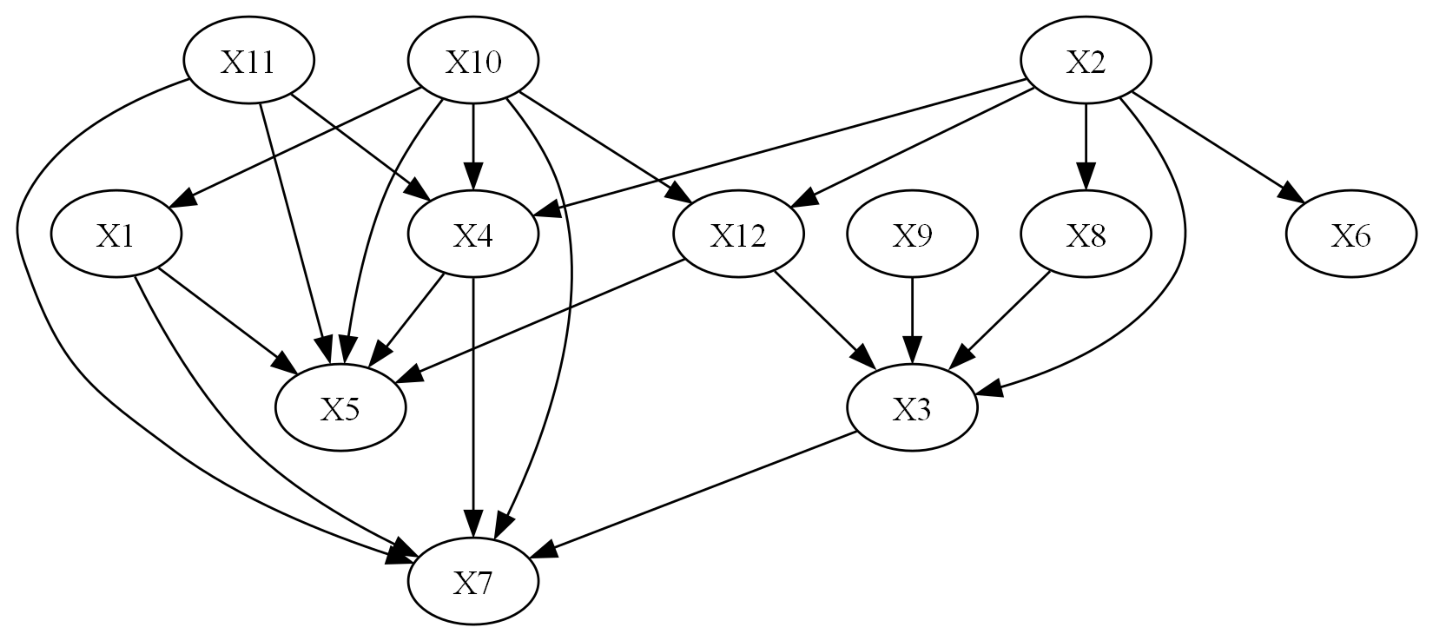

In [59]:
cluster_dag.true_dag.draw_pydot_graph()

In [60]:
# cluster_dag.cdag_to_mpdag()
# cluster_dag.draw_mpdag()

In [61]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

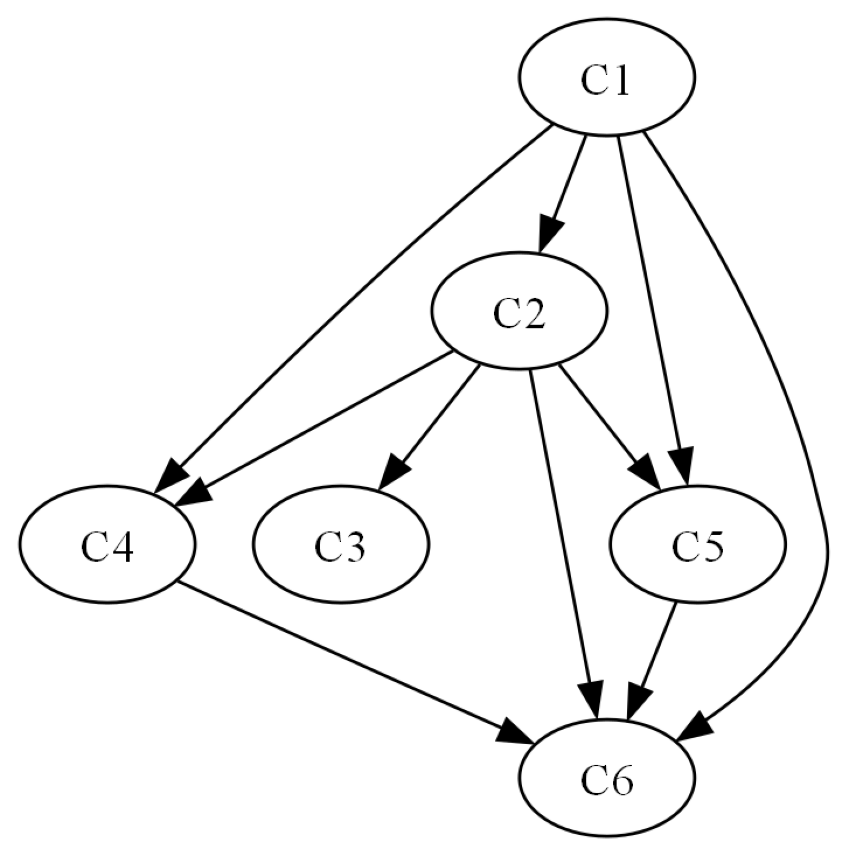

In [62]:
cluster_dag.draw_cluster_graph()

In [63]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.9, \
                  indep_test = "fisherz", \
                  verbose = True, show_progress=True)
est_graph = cluster_pc.run()

Topological ordering ['C1', 'C2', 'C5', 'C3', 'C4', 'C6']
Cluster node indices of C1 are [9]
Local graph node indices of C1 are [9]


C1 phase, no nonchild, nothing to do: 100%|██████████| 1/1 [00:00<00:00, 1000.79it/s, duration: 0.00sec]


Cluster node indices of C2 are [ 0  1  8 10]
Local graph node indices of C2 are [ 0  1  8  9 10]


C2 phase, Depth=2, working on node 10: 100%|██████████| 4/4 [00:00<00:00, 266.81it/s, duration: 0.05sec]


Nonchilds of 0 are [ 1  8  9 10]
Testing edges from 0 to 1
0 dep 1 | () with p-value 0.250982
Testing edges from 0 to 8
0 dep 8 | () with p-value 0.785293
Testing edges from 0 to 9
0 dep 9 | () with p-value 0.255502
Neighbors of 9 in local graph are [ 0  1  8 10]
0 dep 9 | () with p-value 0.255502
Testing edges from 0 to 10
0 dep 10 | () with p-value 0.778311
Nonchilds of 1 are [ 0  8  9 10]
Testing edges from 1 to 0
1 dep 0 | () with p-value 0.250982
Testing edges from 1 to 8
1 dep 8 | () with p-value 0.148790
Testing edges from 1 to 9
1 dep 9 | () with p-value 0.262325
Neighbors of 9 in local graph are [ 0  1  8 10]
1 dep 9 | () with p-value 0.262325
Testing edges from 1 to 10
1 dep 10 | () with p-value 0.744338
Nonchilds of 8 are [ 0  1  9 10]
Testing edges from 8 to 0
8 dep 0 | () with p-value 0.785293
Testing edges from 8 to 1
8 dep 1 | () with p-value 0.148790
Testing edges from 8 to 9
8 dep 9 | () with p-value 0.845869
Neighbors of 9 in local graph are [ 0  1  8 10]
8 dep 9 | ()

C5 phase, Depth=3, working on node 3: 100%|██████████| 1/1 [00:00<00:00, 76.98it/s, duration: 0.04sec]


Nonchilds of 3 are [ 0  1  8  9 10]
Testing edges from 3 to 0
3 dep 0 | () with p-value 0.222778
Neighbors of 0 in local graph are [ 1  3  9 10]
3 dep 0 | () with p-value 0.222778
Testing edges from 3 to 1
3 dep 1 | () with p-value 0.003888
Neighbors of 1 in local graph are [0 3 8 9]
3 dep 1 | () with p-value 0.003888
Testing edges from 3 to 8
3 dep 8 | () with p-value 0.491785
Neighbors of 8 in local graph are [ 1  3 10]
3 dep 8 | () with p-value 0.491785
Testing edges from 3 to 9
3 dep 9 | () with p-value 0.215855
Neighbors of 9 in local graph are [ 0  1  3 10]
3 dep 9 | () with p-value 0.215855
Testing edges from 3 to 10
3 dep 10 | () with p-value 0.323698
Neighbors of 10 in local graph are [0 3 8 9]
3 dep 10 | () with p-value 0.323698
Nonchilds of 3 are [ 0  1  8  9 10]
Testing edges from 3 to 0
3 dep 0 | (1,) with p-value 0.636520
3 dep 0 | (8,) with p-value 0.205999
3 dep 0 | (9,) with p-value 0.434421
3 dep 0 | (10,) with p-value 0.268955
Neighbors of 0 in local graph are [ 1  3

C3 phase, Depth=2, working on node 5: 100%|██████████| 1/1 [00:00<00:00, 125.07it/s, duration: 0.02sec]


Nonchilds of 5 are [ 0  1  8 10]
Testing edges from 5 to 0
5 dep 0 | () with p-value 0.471444
Neighbors of 0 in local graph are [ 1  5 10]
5 dep 0 | () with p-value 0.471444
Testing edges from 5 to 1
5 dep 1 | () with p-value 0.114923
Neighbors of 1 in local graph are [0 5 8]
5 dep 1 | () with p-value 0.114923
Testing edges from 5 to 8
5 dep 8 | () with p-value 0.237273
Neighbors of 8 in local graph are [ 1  5 10]
5 dep 8 | () with p-value 0.237273
Testing edges from 5 to 10
5 dep 10 | () with p-value 0.731020
Neighbors of 10 in local graph are [0 5 8]
5 dep 10 | () with p-value 0.731020
Nonchilds of 5 are [ 0  1  8 10]
Testing edges from 5 to 0
5 dep 0 | (1,) with p-value 0.880131
5 dep 0 | (8,) with p-value 0.383057
5 dep 0 | (10,) with p-value 0.522108
Neighbors of 0 in local graph are [ 1  5 10]
5 dep 0 | (1,) with p-value 0.880131
5 dep 0 | (10,) with p-value 0.522108
Testing edges from 5 to 1
5 dep 1 | (0,) with p-value 0.196162
5 dep 1 | (8,) with p-value 0.281454
5 dep 1 | (10,

C4 phase, Depth=4, working on node 11: 100%|██████████| 2/2 [00:00<00:00, 332.63it/s, duration: 0.06sec]

Nonchilds of 7 are [ 0  1  8  9 10 11]
Testing edges from 7 to 0
7 dep 0 | () with p-value 0.355977
Neighbors of 0 in local graph are [ 1  7  9 10 11]
7 dep 0 | () with p-value 0.355977
Testing edges from 7 to 1
7 dep 1 | () with p-value 0.121294
Neighbors of 1 in local graph are [ 0  7  8  9 11]
7 dep 1 | () with p-value 0.121294
Testing edges from 7 to 8
7 dep 8 | () with p-value 0.799912
Neighbors of 8 in local graph are [ 1  7 10 11]
7 dep 8 | () with p-value 0.799912
Testing edges from 7 to 9
7 dep 9 | () with p-value 0.775954
Neighbors of 9 in local graph are [ 0  1  7 10 11]
7 dep 9 | () with p-value 0.775954
Testing edges from 7 to 10
7 dep 10 | () with p-value 0.157199
Neighbors of 10 in local graph are [ 0  7  8  9 11]
7 dep 10 | () with p-value 0.157199
Testing edges from 7 to 11
7 ind 11 | () with p-value 0.933576
Nonchilds of 11 are [ 0  1  7  8  9 10]
Testing edges from 11 to 0
11 ind 0 | () with p-value 0.996684
Neighbors of 0 in local graph are [ 1  7  9 10 11]
11 ind 0

C4 phase, Depth=4, working on node 11: 100%|██████████| 2/2 [00:00<00:00, 332.63it/s, duration: 0.06sec]


Cluster node indices of C6 are [2 4 6]
Local graph node indices of C6 are [ 0  1  2  3  4  6  7  8  9 10 11]


C6 phase, Depth=1, working on node 6: 100%|██████████| 3/3 [00:00<00:00, 56.64it/s]  

Nonchilds of 2 are [ 0  1  3  4  6  7  8  9 10 11]
Testing edges from 2 to 0
2 dep 0 | () with p-value 0.149673
Neighbors of 0 in local graph are [ 1  2  4  6  9 10]
2 dep 0 | () with p-value 0.149673
Testing edges from 2 to 1
2 dep 1 | () with p-value 0.001034
Neighbors of 1 in local graph are [ 0  2  3  4  6  7  8  9 11]
2 dep 1 | () with p-value 0.001034
Testing edges from 2 to 3
2 dep 3 | () with p-value 0.167967
Neighbors of 3 in local graph are [ 1  2  4  6  8  9 10]
2 dep 3 | () with p-value 0.167967
Testing edges from 2 to 4
2 dep 4 | () with p-value 0.784896
Testing edges from 2 to 6
2 dep 6 | () with p-value 0.311200
Testing edges from 2 to 7
2 dep 7 | () with p-value 0.026840
Neighbors of 7 in local graph are [ 1  2  4  6  8 10]
2 dep 7 | () with p-value 0.026840
Testing edges from 2 to 8
2 dep 8 | () with p-value 0.092423
Neighbors of 8 in local graph are [ 1  2  3  4  6  7 10 11]
2 dep 8 | () with p-value 0.092423
Testing edges from 2 to 9
2 dep 9 | () with p-value 0.73035

C6 phase, Depth=1, working on node 6: 100%|██████████| 3/3 [00:00<00:00, 38.98it/s]

Nonchilds of 6 are [ 0  1  2  3  4  7  8  9 10 11]
Testing edges from 6 to 0
6 dep 0 | (1,) with p-value 0.588975
6 dep 0 | (2,) with p-value 0.436976
6 dep 0 | (3,) with p-value 0.892005
6 dep 0 | (4,) with p-value 0.270534
6 dep 0 | (7,) with p-value 0.252740
6 dep 0 | (8,) with p-value 0.208237
6 dep 0 | (9,) with p-value 0.450597
6 dep 0 | (10,) with p-value 0.268803
6 dep 0 | (11,) with p-value 0.250441
Neighbors of 0 in local graph are [ 1  2  4  6  9 10]
6 dep 0 | (1,) with p-value 0.588975
6 dep 0 | (2,) with p-value 0.436976
6 dep 0 | (4,) with p-value 0.270534
6 dep 0 | (9,) with p-value 0.450597
6 dep 0 | (10,) with p-value 0.268803
Testing edges from 6 to 1
6 dep 1 | (0,) with p-value 0.058989
6 dep 1 | (2,) with p-value 0.006352
6 dep 1 | (3,) with p-value 0.285436
6 dep 1 | (4,) with p-value 0.026269
6 dep 1 | (7,) with p-value 0.007227
6 dep 1 | (8,) with p-value 0.035457
6 dep 1 | (9,) with p-value 0.060382
6 dep 1 | (10,) with p-value 0.004260
6 dep 1 | (11,) with p-va

C6 phase, Depth=2, working on node 2:  33%|███▎      | 1/3 [00:00<00:00, 999.12it/s]

Deleted edge from X3 to X5
Deleted edge from X5 to X1
Deleted edge from X3 to X11
Deleted edge from X5 to X7
Deleted edge from X7 to X9
Deleted edge from X10 to X3
Deleted edge from X12 to X3
Deleted edge from X7 to X8
Nonchilds of 2 are [0 1 3 6 7 8]
Testing edges from 2 to 0
2 dep 0 | (1, 3) with p-value 0.171515
2 dep 0 | (1, 6) with p-value 0.136241
2 dep 0 | (1, 7) with p-value 0.533189
2 dep 0 | (1, 8) with p-value 0.233852
2 dep 0 | (3, 6) with p-value 0.295385
2 dep 0 | (3, 7) with p-value 0.576891
2 dep 0 | (3, 8) with p-value 0.126494
2 dep 0 | (6, 7) with p-value 0.582662
2 dep 0 | (6, 8) with p-value 0.090060
2 dep 0 | (7, 8) with p-value 0.000829
Neighbors of 0 in local graph are [ 1  2  6  9 10]
2 dep 0 | (1, 6) with p-value 0.136241
2 dep 0 | (1, 9) with p-value 0.219367
2 dep 0 | (1, 10) with p-value 0.287626
2 dep 0 | (6, 9) with p-value 0.302099
2 dep 0 | (6, 10) with p-value 0.287436
2 dep 0 | (9, 10) with p-value 0.104053
Testing edges from 2 to 1
2 dep 1 | (0, 3) w

C6 phase, Depth=2, working on node 6: 100%|██████████| 3/3 [00:00<00:00, 37.52it/s] 

2 dep 3 | (0, 8) with p-value 0.729327
2 dep 3 | (1, 6) with p-value 0.873729
2 dep 3 | (1, 7) with p-value 0.231138
2 dep 3 | (1, 8) with p-value 0.146214
2 dep 3 | (6, 7) with p-value 0.560025
2 dep 3 | (6, 8) with p-value 0.121615
2 dep 3 | (7, 8) with p-value 0.213376
Neighbors of 3 in local graph are [ 1  2  4  6  8  9 10]
2 dep 3 | (1, 4) with p-value 0.122828
2 dep 3 | (1, 6) with p-value 0.873729
2 dep 3 | (1, 8) with p-value 0.146214
2 dep 3 | (1, 9) with p-value 0.134884
2 dep 3 | (1, 10) with p-value 0.277655
2 dep 3 | (4, 6) with p-value 0.088427
2 dep 3 | (4, 8) with p-value 0.301616
2 dep 3 | (4, 9) with p-value 0.214445
2 dep 3 | (4, 10) with p-value 0.049588
2 dep 3 | (6, 8) with p-value 0.121615
2 dep 3 | (6, 9) with p-value 0.184292
2 dep 3 | (6, 10) with p-value 0.110283
2 dep 3 | (8, 9) with p-value 0.380437
2 dep 3 | (8, 10) with p-value 0.103467
2 dep 3 | (9, 10) with p-value 0.008943
Testing edges from 2 to 6
2 dep 6 | (0, 1) with p-value 0.032173
2 dep 6 | (0, 3

C6 phase, Depth=3, working on node 4:  67%|██████▋   | 2/3 [00:00<00:00, 50.03it/s] 

6 dep 3 | (8, 10) with p-value 0.000020
6 dep 3 | (9, 10) with p-value 0.000081
Testing edges from 6 to 9
6 dep 9 | (0, 1) with p-value 0.602125
6 dep 9 | (0, 2) with p-value 0.377275
6 dep 9 | (0, 3) with p-value 0.703181
6 dep 9 | (0, 10) with p-value 0.166865
6 dep 9 | (0, 11) with p-value 0.453016
6 ind 9 | (1, 2) with p-value 0.971763
6 dep 9 | (1, 3) with p-value 0.586529
6 dep 9 | (1, 10) with p-value 0.112694
6 dep 9 | (1, 11) with p-value 0.448061
6 dep 9 | (2, 3) with p-value 0.737490
6 dep 9 | (2, 10) with p-value 0.030296
6 dep 9 | (2, 11) with p-value 0.297092
6 dep 9 | (3, 10) with p-value 0.493570
6 dep 9 | (3, 11) with p-value 0.325442
6 dep 9 | (10, 11) with p-value 0.099589
Neighbors of 9 in local graph are [ 0  1  3  4  6 10 11]
6 dep 9 | (0, 1) with p-value 0.602125
6 dep 9 | (0, 3) with p-value 0.703181
6 dep 9 | (0, 4) with p-value 0.437505
6 dep 9 | (0, 10) with p-value 0.166865
6 dep 9 | (0, 11) with p-value 0.453016
6 dep 9 | (1, 3) with p-value 0.586529
6 dep 

C6 phase, Depth=4, working on node 6: 100%|██████████| 3/3 [00:00<00:00, 214.42it/s]

Nonchilds of 6 are [ 2  3 10]
Testing edges from 6 to 2
Testing edges from 6 to 3
Neighbors of 3 in local graph are [ 1  2  6  8  9 10]
6 dep 3 | (1, 2, 8) with p-value 0.001299
6 dep 3 | (1, 2, 9) with p-value 0.001802
6 dep 3 | (1, 2, 10) with p-value 0.006057
6 dep 3 | (1, 8, 9) with p-value 0.000198
6 dep 3 | (1, 8, 10) with p-value 0.001924
6 dep 3 | (1, 9, 10) with p-value 0.013049
6 dep 3 | (2, 8, 9) with p-value 0.000041
6 dep 3 | (2, 8, 10) with p-value 0.000094
6 dep 3 | (2, 9, 10) with p-value 0.003513
6 dep 3 | (8, 9, 10) with p-value 0.001955
Testing edges from 6 to 10
Neighbors of 10 in local graph are [0 3 6 7 8 9]
6 dep 10 | (0, 3, 7) with p-value 0.549984
6 dep 10 | (0, 3, 8) with p-value 0.715632
6 dep 10 | (0, 3, 9) with p-value 0.561745
6 dep 10 | (0, 7, 8) with p-value 0.226732
6 dep 10 | (0, 7, 9) with p-value 0.130540
6 dep 10 | (0, 8, 9) with p-value 0.066965
6 dep 10 | (3, 7, 8) with p-value 0.481219
6 dep 10 | (3, 7, 9) with p-value 0.787922
6 dep 10 | (3, 8, 

C6 phase, Depth=6, working on node 6: 100%|██████████| 3/3 [00:00<00:00, 375.21it/s, duration: 0.33sec]

Nonchilds of 2 are [0 1 6 7]
Testing edges from 2 to 0
Neighbors of 0 in local graph are [ 1  2  9 10]
Testing edges from 2 to 1
Neighbors of 1 in local graph are [ 0  2  3  7  8  9 11]
2 dep 1 | (0, 3, 7, 8, 9) with p-value 0.189552
2 dep 1 | (0, 3, 7, 8, 11) with p-value 0.402290
2 dep 1 | (0, 3, 7, 9, 11) with p-value 0.040191
2 dep 1 | (0, 3, 8, 9, 11) with p-value 0.027666
2 dep 1 | (0, 7, 8, 9, 11) with p-value 0.195458
2 dep 1 | (3, 7, 8, 9, 11) with p-value 0.567866
Testing edges from 2 to 6
Testing edges from 2 to 7
Neighbors of 7 in local graph are [ 1  2  8 10]
Duration of algorithm was 0.54sec


In [64]:
cluster_dag.true_dag.to_nx_graph()
# from clustercausal.algorithms.OldClusterPC import ClusterPC
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.01, \
                  indep_test = "d_separation", \
                  verbose = False, show_progress=True, true_dag = cluster_dag.true_dag.nx_graph)
est_graph_dsep = cluster_pc.run()

C6 phase, Depth=5, working on node 6: 100%|██████████| 3/3 [00:00<00:00, 250.15it/s, duration: 0.56sec]

Duration of algorithm was 0.64sec


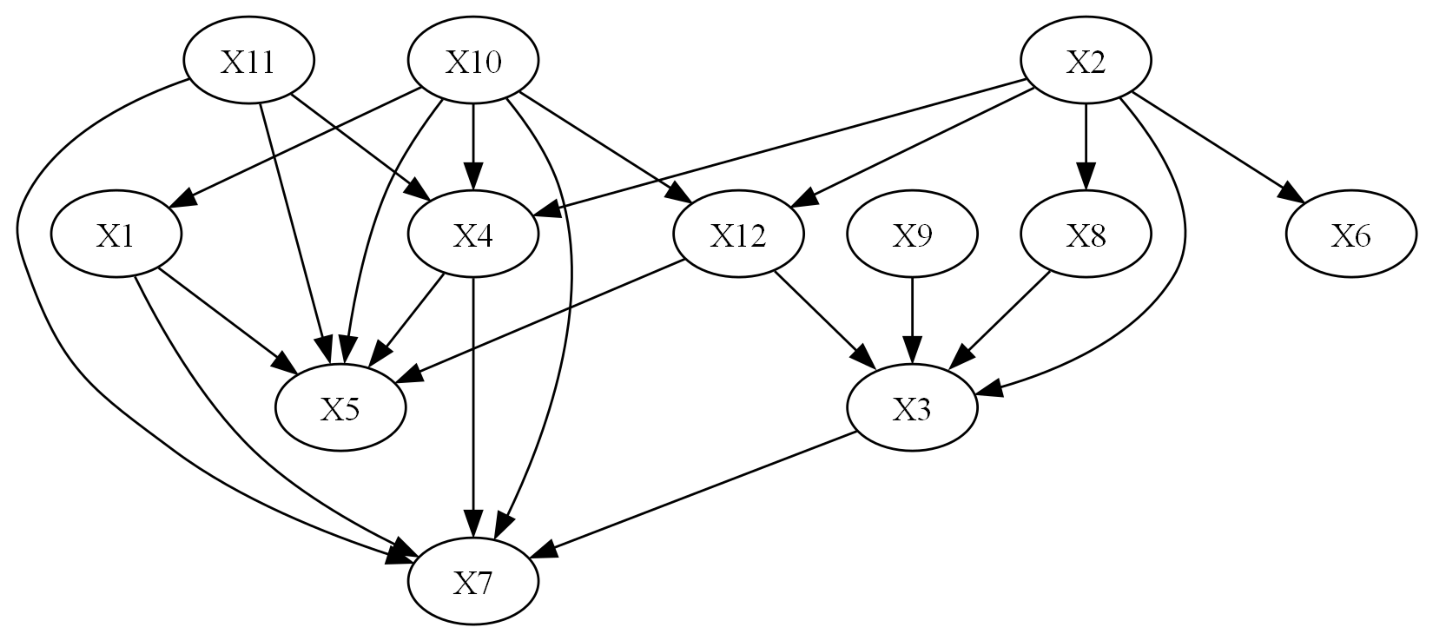

In [65]:
cluster_dag.true_dag.draw_pydot_graph()

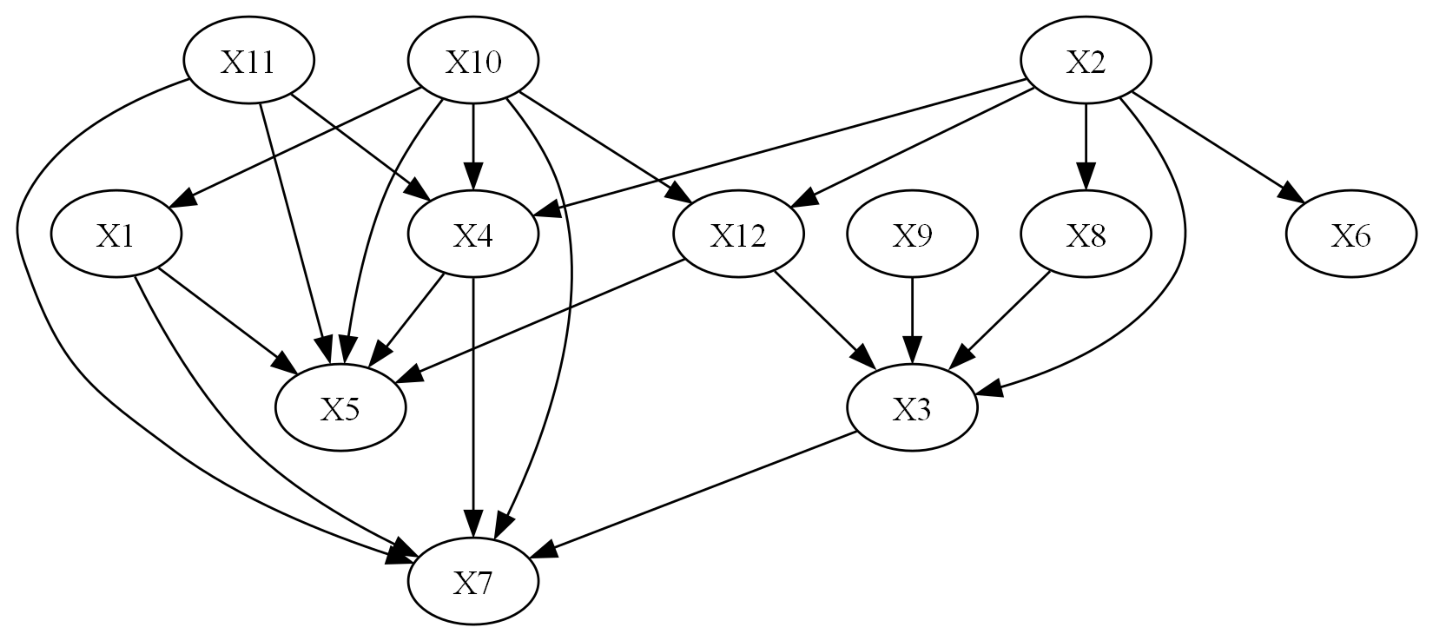

In [66]:
est_graph_dsep.draw_pydot_graph()

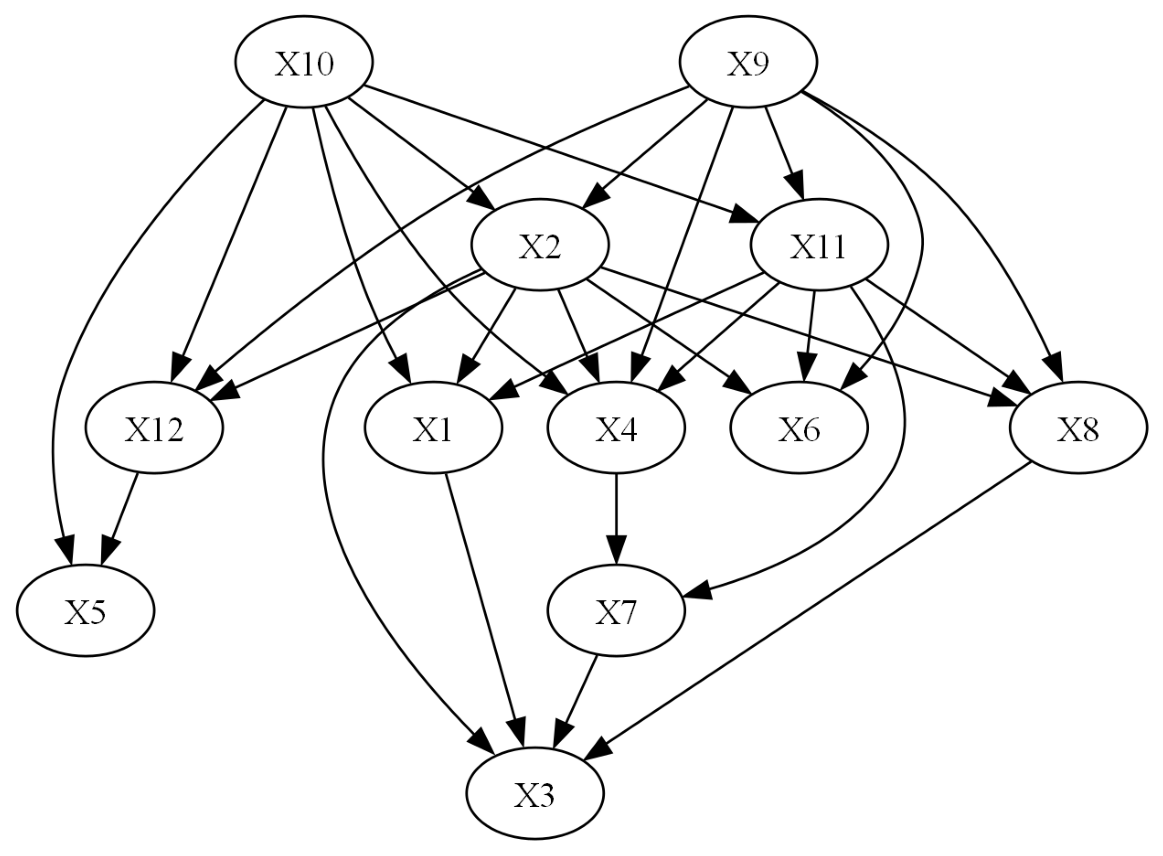

In [67]:
est_graph.draw_pydot_graph()

In [68]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd, sid = evaluation.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)
print("SID: ", sid)

Adjacency confusion:  {'true_positive': 15, 'false_positive': 13, 'false_negative': 7, 'true_negative': 31, 'precision': 0.5357142857142857, 'recall': 0.6818181818181818, 'f1_score': 0.6}
Arrow confusion:  {'true_positive': 14.0, 'false_positive': 14.0, 'false_negative': 8.0, 'true_negative': 108.0, 'precision': 0.5, 'recall': 0.6363636363636364, 'f1_score': 0.56, 'true_positive_ce': 14.0, 'false_positive_ce': 1.0, 'false_negative_ce': 1.0, 'true_negative_ce': 128.0, 'precision_ce': 0.9333333333333333, 'recall_ce': 0.9333333333333333, 'f1_score_ce': 0.9333333333333333}
SHD:  21
SID:  {'sid_lower': None}


In [69]:
evaluation_dsep = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph_dsep.G)
adjacency_confusion, arrow_confusion, shd, sid = evaluation_dsep.get_causallearn_metrics(sid = True)
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)
print("SID: ", sid)

Adjacency confusion:  {'true_positive': 22, 'false_positive': 0, 'false_negative': 0, 'true_negative': 44, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
Arrow confusion:  {'true_positive': 22.0, 'false_positive': 0.0, 'false_negative': 0.0, 'true_negative': 122.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0, 'true_positive_ce': 22.0, 'false_positive_ce': 0.0, 'false_negative_ce': 0.0, 'true_negative_ce': 122.0, 'precision_ce': 1.0, 'recall_ce': 1.0, 'f1_score_ce': 1.0}
SHD:  0
SID:  {'sid_lower': 0, 'sid_upper': 19}


In [70]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
causallearn_cg = pc(cluster_dag.data, alpha = 0.9, verbose=False, node_names=node_names)

Depth=3, working on node 11: 100%|██████████| 12/12 [00:00<00:00, 203.50it/s]


In [71]:
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd, cl_sid  = evaluation_causallearn.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)
# print("SID", cl_sid)

Adjacency confusion:  {'true_positive': 10, 'false_positive': 7, 'false_negative': 12, 'true_negative': 37, 'precision': 0.5882352941176471, 'recall': 0.45454545454545453, 'f1_score': 0.5128205128205129}
Arrow confusion:  {'true_positive': 7.0, 'false_positive': 8.0, 'false_negative': 15.0, 'true_negative': 114.0, 'precision': 0.4666666666666667, 'recall': 0.3181818181818182, 'f1_score': 0.3783783783783784, 'true_positive_ce': 7.0, 'false_positive_ce': 2.0, 'false_negative_ce': 3.0, 'true_negative_ce': 132.0, 'precision_ce': 0.7777777777777778, 'recall_ce': 0.7, 'f1_score_ce': 0.7368421052631577}
SHD:  21


In [72]:
causallearn_cg_dsep = pc(cluster_dag.data, alpha = 0.01, indep_test = 'd_separation',  verbose=False, node_names=node_names, true_dag = cluster_dag.true_dag.nx_graph)

Depth=5, working on node 11: 100%|██████████| 12/12 [00:00<00:00, 706.25it/s]


In [73]:
evaluation_causallearn_dsep = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg_dsep.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd, cl_sid = evaluation_causallearn_dsep.get_causallearn_metrics(sid = True)
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)
print("SID", cl_sid)

Adjacency confusion:  {'true_positive': 22, 'false_positive': 0, 'false_negative': 0, 'true_negative': 44, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
Arrow confusion:  {'true_positive': 19.0, 'false_positive': 0.0, 'false_negative': 3.0, 'true_negative': 122.0, 'precision': 1.0, 'recall': 0.8636363636363636, 'f1_score': 0.9268292682926829, 'true_positive_ce': 19.0, 'false_positive_ce': 0.0, 'false_negative_ce': 3.0, 'true_negative_ce': 122.0, 'precision_ce': 1.0, 'recall_ce': 0.8636363636363636, 'f1_score_ce': 0.9268292682926829}
SHD:  0
SID {'sid_lower': 0, 'sid_upper': 19}


In [74]:
print(adjacency_confusion == cl_adjacency_confusion)
print(arrow_confusion == cl_arrow_confusion)
print(shd == cl_shd)

True
False
True


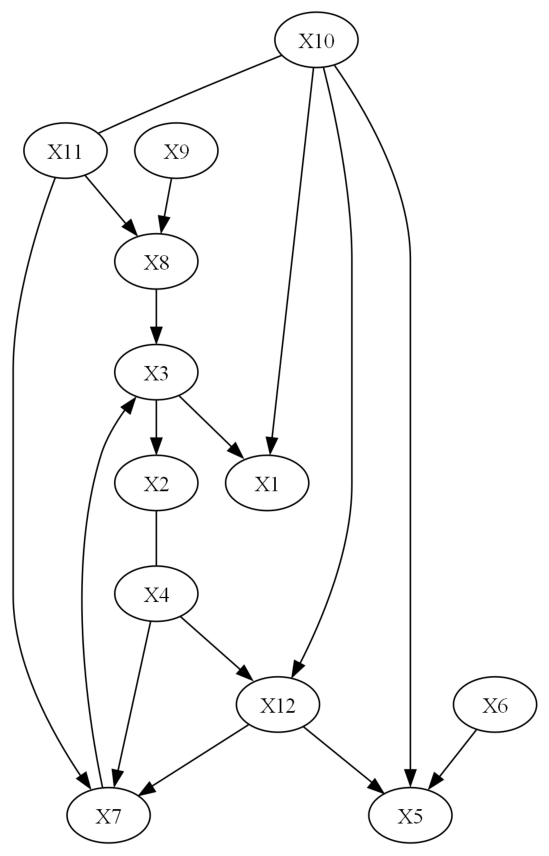

In [75]:
causallearn_cg.draw_pydot_graph()

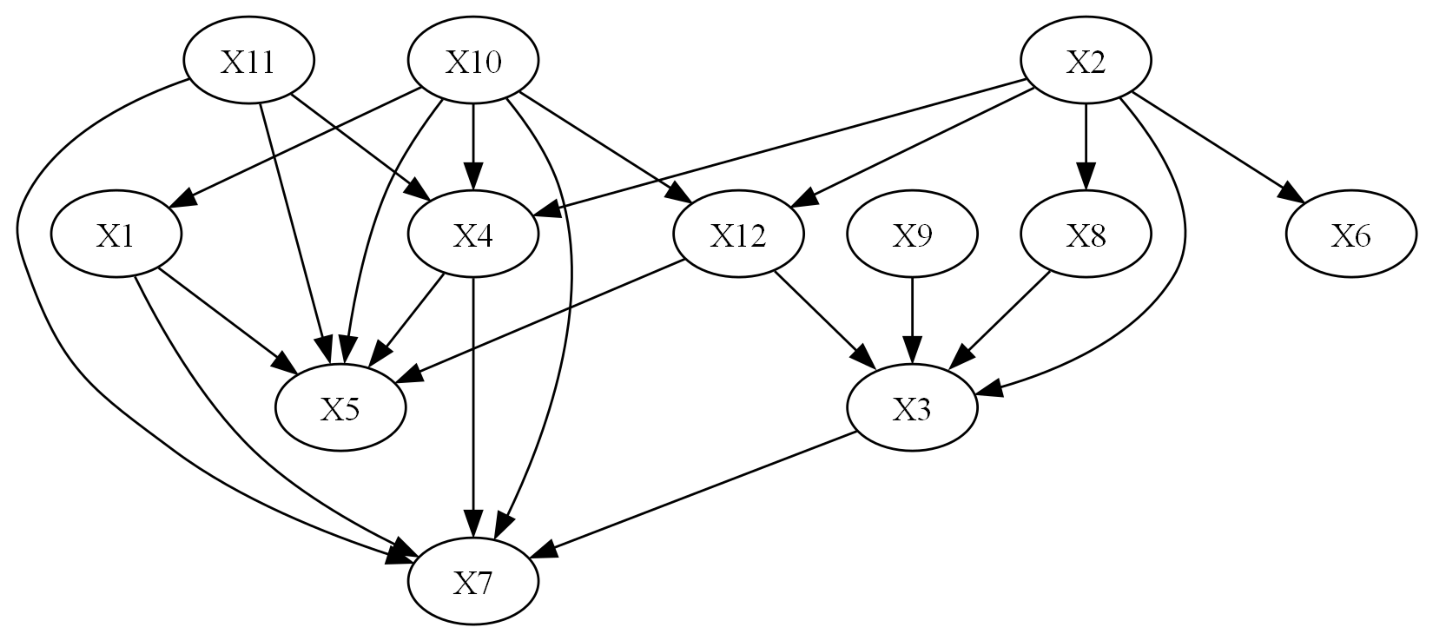

In [76]:
cluster_dag.true_dag.draw_pydot_graph()

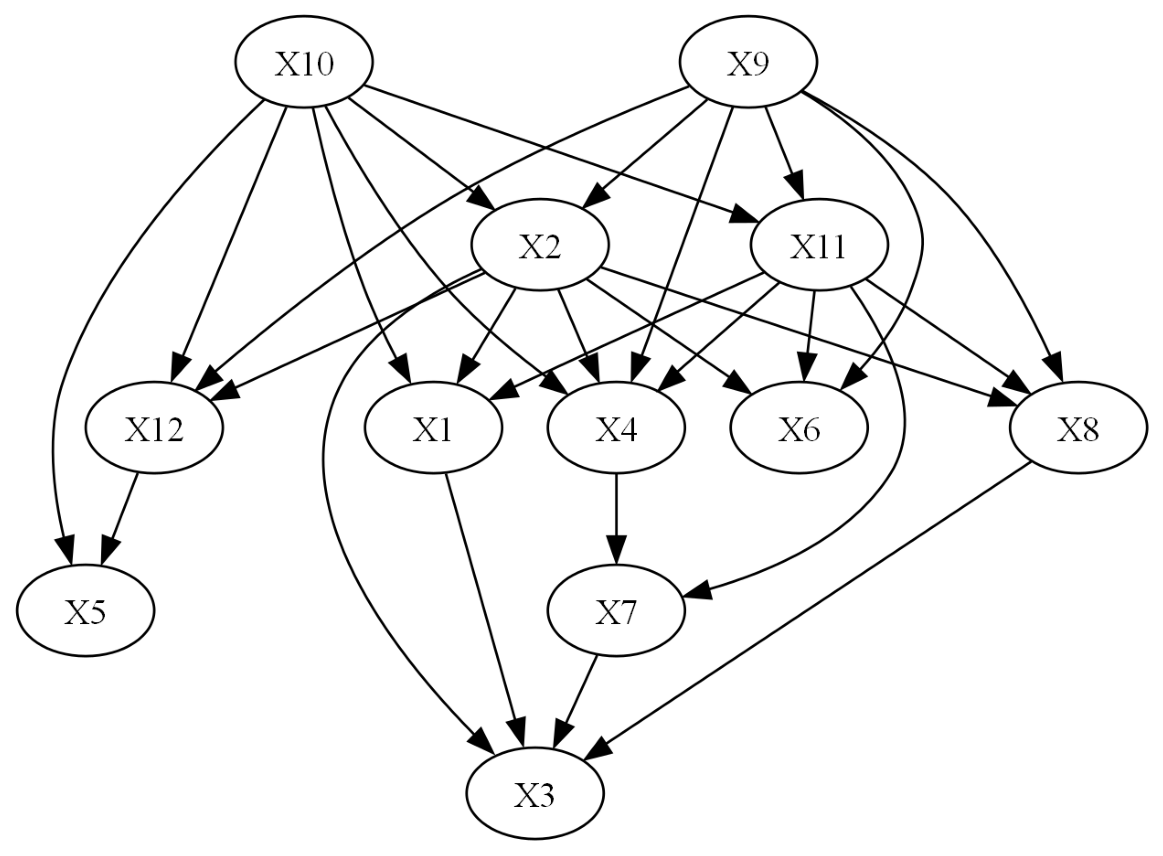

In [77]:
est_graph.draw_pydot_graph()

{'C1': ['X10'], 'C2': ['X2', 'X9', 'X11', 'X1'], 'C3': ['X6'], 'C4': ['X8', 'X12'], 'C5': ['X4'], 'C6': ['X3', 'X5', 'X7']}


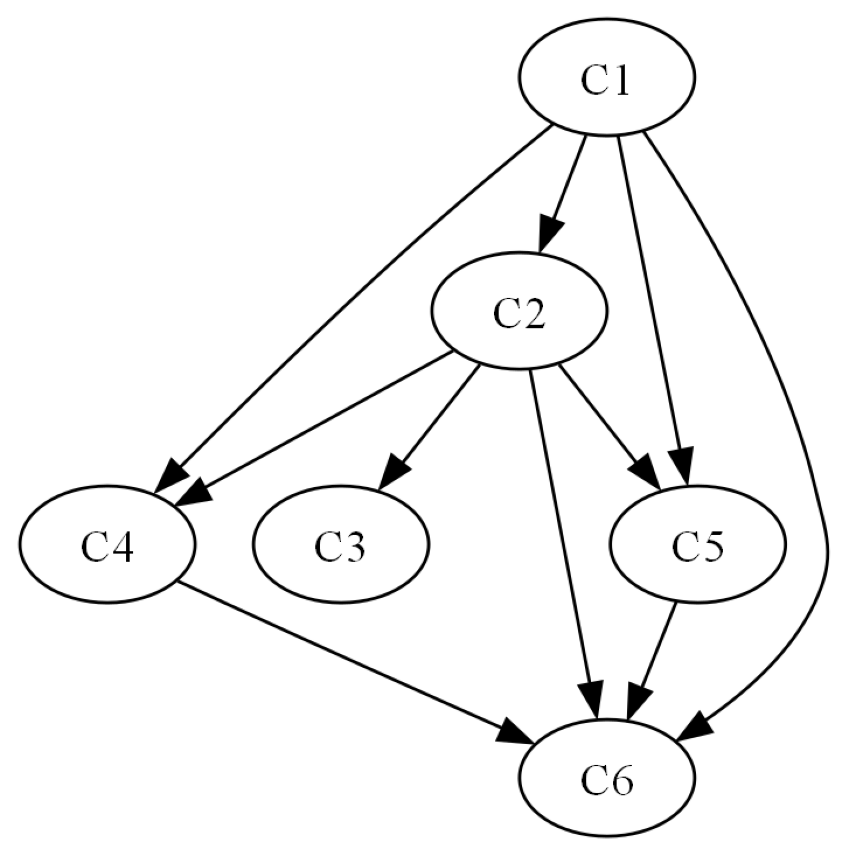

In [84]:
print(cluster_dag.cluster_mapping)
cluster_dag.cluster_graph.draw_pydot_graph()

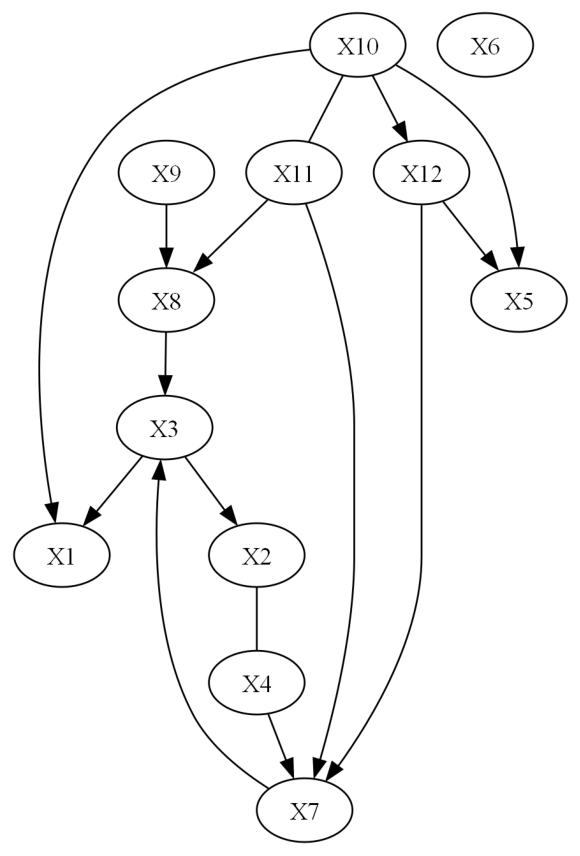

In [82]:
causallearn_cg.draw_pydot_graph()

In [92]:
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint
n_6 = ClusterDAG.get_node_by_name('X6', cluster_dag.true_dag)
n_8 = ClusterDAG.get_node_by_name('X8', cluster_dag.true_dag)
edge = Edge(n_6, n_8, Endpoint.TAIL, Endpoint.ARROW)
test_cg = causallearn_cg
test_cg.G.add_edge(edge)

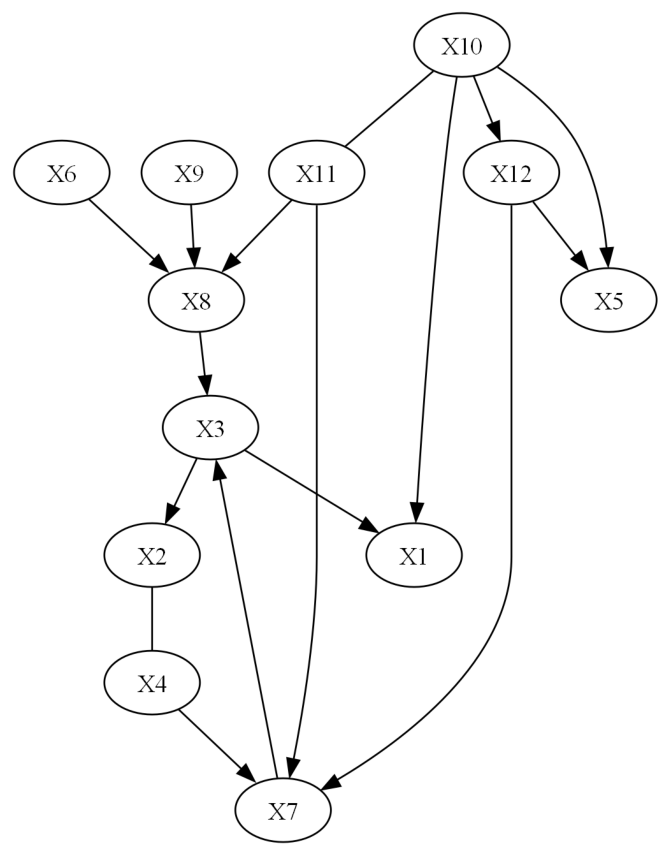

In [94]:
test_cg.draw_pydot_graph()

In [20]:
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint

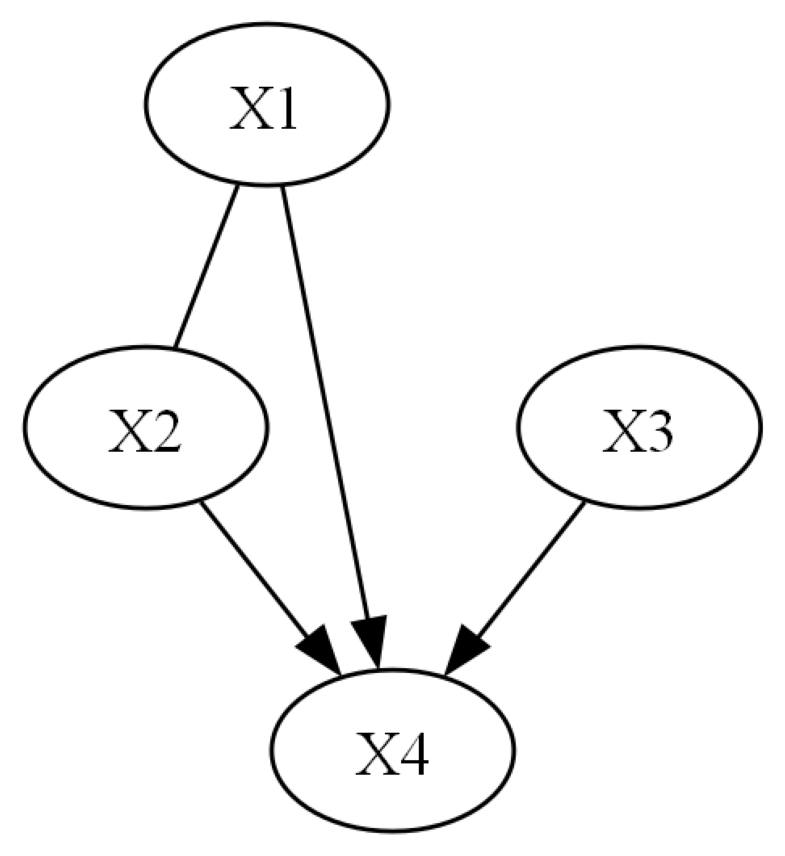

In [21]:
cluster_mapping = {'C1' : ['X1', 'X2'], 'C2' : ['X3'], 'C3' : ['X4']}
cluster_edges = [('C1', 'C3'), ('C2', 'C3')]
cdag = ClusterDAG(cluster_mapping = cluster_mapping, cluster_edges = cluster_edges)
cdag.cdag_to_mpdag()
cdag.cg.draw_pydot_graph()

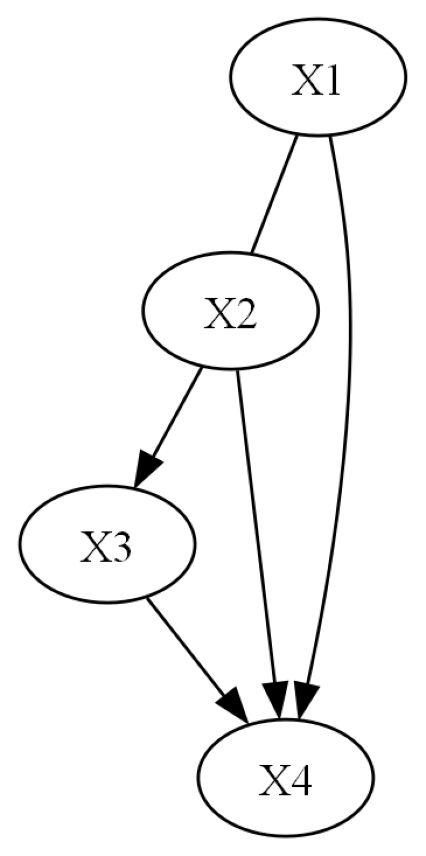

In [22]:
n_2 = ClusterDAG.get_node_by_name('X2', cdag.cg)
n_3 = ClusterDAG.get_node_by_name('X3', cdag.cg)
edge = Edge(n_2, n_3, Endpoint.TAIL, Endpoint.ARROW)
wrong_cg = cdag.cg
wrong_cg.G.add_edge(edge)
wrong_cg.draw_pydot_graph()

In [28]:
%load_ext autoreload
%autoreload 2
from clustercausal.experiments.Evaluator import Evaluator
pruned_cg = Evaluator.get_cluster_pruned_benchmark(cdag = cdag, cg = wrong_cg)
pruned_cg == cdag.cg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

In [24]:
# n_1 = ClusterDAG.get_node_by_name('X1', cdag.cg)
# n_2 = ClusterDAG.get_node_by_name('X2', cdag.cg)
# edge = Edge(n_1, n_2, Endpoint.TAIL, Endpoint.TAIL)
# cdag.cg.G.remove_edge(edge)
# cdag.cg.draw_pydot_graph()

In [105]:
test_cg = evaluation.get_cluster_pruned_benchmark(cdag = cdag, cg = cdag.cg)
test_cg.draw_pydot_graph()